In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

**参考：https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html**

# 使用pytorch内置的方法可以导入cifar10数据集

**记得设置好下载路径**  
**开VPN连接美国、加拿大节点更佳**

**Windows版本的pytorch在此处可能会出现报错。**    
**把num_workers 改成0 就行了。**

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# 熟悉数据集

**放出一部分图片和对应的标签**  
**图片十分模糊，我的天！**

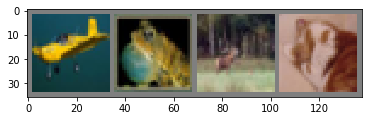

plane  frog  deer   cat


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 建立自己的神经网络

**我在基础之上增加了线性层**

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    '''
    本神经网络总共进行两次卷积、两次池化和五次线性操作
    在原有的神经网络的基础上增加了两层线性层
    '''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


net = Net()

**来看看神经网络的结构**

In [5]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=10, bias=True)
)


**来看看神经网络的输入参数——这一步很重要！**

In [6]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

14
torch.Size([6, 3, 5, 5])


**定义损失函数**

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 训练开始！

**epoch为训练轮数。如果训练轮数太小，可能结果会很不准确。**

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.303
[1,  6000] loss: 2.300
[1,  8000] loss: 2.193
[1, 10000] loss: 1.920
[1, 12000] loss: 1.761
[2,  2000] loss: 1.636
[2,  4000] loss: 1.562
[2,  6000] loss: 1.527
[2,  8000] loss: 1.492
[2, 10000] loss: 1.435
[2, 12000] loss: 1.444
[3,  2000] loss: 1.363
[3,  4000] loss: 1.352
[3,  6000] loss: 1.336
[3,  8000] loss: 1.313
[3, 10000] loss: 1.312
[3, 12000] loss: 1.308
[4,  2000] loss: 1.220
[4,  4000] loss: 1.264
[4,  6000] loss: 1.227
[4,  8000] loss: 1.228
[4, 10000] loss: 1.196
[4, 12000] loss: 1.211
[5,  2000] loss: 1.154
[5,  4000] loss: 1.153
[5,  6000] loss: 1.164
[5,  8000] loss: 1.143
[5, 10000] loss: 1.135
[5, 12000] loss: 1.135
[6,  2000] loss: 1.059
[6,  4000] loss: 1.081
[6,  6000] loss: 1.079
[6,  8000] loss: 1.090
[6, 10000] loss: 1.103
[6, 12000] loss: 1.066
[7,  2000] loss: 1.012
[7,  4000] loss: 1.029
[7,  6000] loss: 1.031
[7,  8000] loss: 1.022
[7, 10000] loss: 1.037
[7, 12000] loss: 1.028
[8,  2000] loss: 0.952
[8,  4000] 

**保存模型**

In [10]:
PATH = './cifar(10)_net.pth'
torch.save(net.state_dict(), PATH)

In [11]:
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

**恭喜你！模型保存成功**

# 来看看我们这个模型的训练结果

**分别计算总准确度，和每一个class的准确度**

In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [13]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 77 %
Accuracy of  bird : 48 %
Accuracy of   cat : 42 %
Accuracy of  deer : 49 %
Accuracy of   dog : 52 %
Accuracy of  frog : 73 %
Accuracy of horse : 67 %
Accuracy of  ship : 72 %
Accuracy of truck : 65 %


**这是一个差强人意的模型，准确度太低了！**

In [15]:
class Net2(nn.Module):
    '''
    定义一个新的神经网络
    改变了卷积层的参数，增加了宽度
    '''
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 5) # change the 2nd parameter
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 16, 5) # Remenber to change the 1st parameter!
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

net2 = Net2()

In [16]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.309
[1,  4000] loss: 2.308
[1,  6000] loss: 2.308
[1,  8000] loss: 2.308
[1, 10000] loss: 2.308
[1, 12000] loss: 2.308
[2,  2000] loss: 2.311
[2,  4000] loss: 2.308
[2,  6000] loss: 2.306
[2,  8000] loss: 2.308
[2, 10000] loss: 2.308
[2, 12000] loss: 2.308
[3,  2000] loss: 2.309
[3,  4000] loss: 2.307
[3,  6000] loss: 2.309
[3,  8000] loss: 2.309
[3, 10000] loss: 2.306
[3, 12000] loss: 2.308
[4,  2000] loss: 2.308
[4,  4000] loss: 2.308
[4,  6000] loss: 2.308
[4,  8000] loss: 2.308
[4, 10000] loss: 2.308
[4, 12000] loss: 2.308
[5,  2000] loss: 2.308
[5,  4000] loss: 2.307
[5,  6000] loss: 2.308
[5,  8000] loss: 2.307
[5, 10000] loss: 2.311
[5, 12000] loss: 2.308
[6,  2000] loss: 2.307
[6,  4000] loss: 2.309
[6,  6000] loss: 2.308
[6,  8000] loss: 2.306
[6, 10000] loss: 2.309
[6, 12000] loss: 2.309
[7,  2000] loss: 2.309
[7,  4000] loss: 2.309
[7,  6000] loss: 2.308
[7,  8000] loss: 2.306
[7, 10000] loss: 2.310
[7, 12000] loss: 2.307
[8,  2000] loss: 2.308
[8,  4000] 

In [17]:
PATH = './cifar(10)_net.pth'
torch.save(net2.state_dict(), PATH)

In [18]:
net2.load_state_dict(torch.load(PATH))

<All keys matched successfully>

**现在我们的模型里面保存了第二次训练得到的模型结果**

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


**我的天！比第一次低了好多！太吓人了！**

# 试一试：

**改变卷积层的宽度，或者增加线性层。**  
**一般来说神经网络越复杂越需要更多轮次的训练。如果增加了线性层，记得适当增加训练轮数**